In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal
from shapely.wkt import loads

from shapely.geometry import Point

On rassemble tous les dataset de tous les cours d'eau

In [4]:
liste_fleuves = ["Garonne", "Loire", "Seine"]
fleuve = liste_fleuves[0]

tableau_stations = pd.read_csv("../../Data/Extraction_Hydro/Stations_" + fleuve + ".csv")
tableau_stations["Cours eau"] = fleuve

mesures = pd.read_csv("../../Data/Extraction_Hydro/Mesures_" + fleuve + ".csv")
mesures["Date"] = pd.to_datetime(mesures["Date"], format = "%Y/%m/%d %H:%M:%S")

for fleuve in liste_fleuves[1:]:
    tableau_fleuve = pd.read_csv("../../Data/Extraction_Hydro/Stations_" + fleuve + ".csv")
    tableau_fleuve["Cours eau"] = fleuve
    tableau_stations = pd.concat([tableau_stations, tableau_fleuve])
    
    mesures_fleuve = pd.read_csv("../../Data/Extraction_Hydro/Mesures_" + fleuve + ".csv")
    mesures_fleuve["Date"] = pd.to_datetime(mesures["Date"], format = "%Y/%m/%d %H:%M:%S")
    mesures = pd.concat([mesures, mesures_fleuve[tableau_fleuve["Code station"]]], axis=1)

In [5]:
tableau_stations.to_csv("../../Data/Extraction_Hydro/Stations.csv",
                        index = False)
mesures.to_csv("../../Data/Extraction_Hydro/Mesures.csv",
                        index = False)

In [6]:
tableau_stations = tableau_stations['geometry'].apply(loads)
tableau_stations = gpd.GeoDataFrame(tableau_stations,
                                   geometry = "geometry")

<AxesSubplot:>

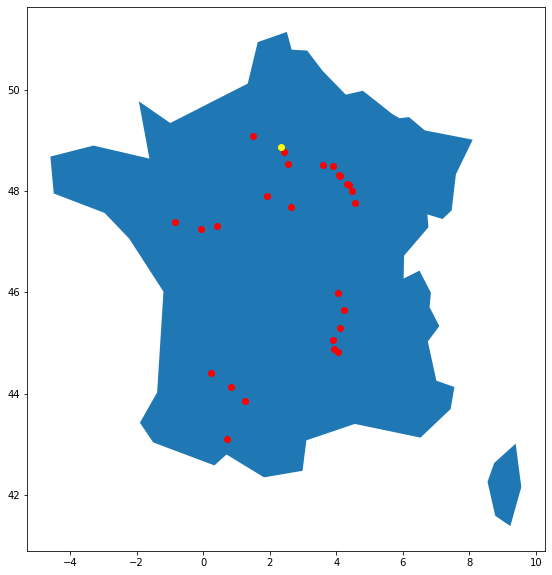

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

france = world[world['name'] == "France"].geometry.explode().values[[1,2]].unary_union()


base = gpd.GeoSeries(france).plot(figsize = (10, 10))
tableau_stations.plot(ax = base, color = "red")
cities[cities['name'] == "Paris"].plot(ax = base, color = "yellow")